Exploratory Data Analysis Diabetes Dataset
===================================================
**Exploratory Data Analysis — Diabetes Prediction Dataset**

### **1. Project Overview**

* **Objective:** Understand structure, quality, and distribution of diabetes dataset.
* **Dataset Source:** Kaggle Diabetes dataset
Dataset Link: https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset/data
* **Prediction Task:** Binary classification (*Outcome* variable)


This program analyzes above dataset from kaggle. Later the project will use Logistic Regression to predict whether a person has diabetes based on various health metrics.

Finally the project will build a model to predict the outcome (diabetes or not) based on the input features.


#### **1.1 Information about dataset attributes**

**Pregnancies:** To express the Number of pregnancies

**Glucose**: To express the Glucose level in blood

**BloodPressure**: To express the Blood pressure measurement

**SkinThickness**: To express the thickness of the skin

**Insulin**: To express the Insulin level in blood

**BMI**: To express the Body mass index

**DiabetesPedigreeFunction**: To express the Diabetes percentage

**Age**: To express the age

**Outcome**: To express the final result 1 is Yes and 0 is No




### **2. Pre-Split EDA**

#### **2.1 Load data**

In [8]:
# Load Libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [9]:
# Read the file to understand general structure of the file
df = pd.read_csv('../data/diabetes.csv')
# Display all columns in the summary instead of ...
pd.set_option('display.max_columns', None)

#### **2.2 Inspect Data**

In [10]:
# Show basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
# Show sample data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
df.shape

(768, 9)

#### **2.3 Data Type Correction**

In [21]:
df.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Since all columns are in appropriate data types, no changes are needed.

#### **2.4 Duplicate Removal**

In [23]:
# Check for duplicates
duplicate_count = df.duplicated().sum()
print(f'Number of duplicate rows: {duplicate_count}')

Number of duplicate rows: 0


Since there is no duplicate we can move to next EDA step.

#### **2.5 Obvious data errors**

##### **2.4.1 Check for negative values**

In [13]:
# Check missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There is no null values in this dataset, so no treatment is needed to address null values. If there were null values, we would have to decide whether to drop those rows/columns or impute them based on the context and amount of missing data. However if we decide to impute that should happen as part of data preprocessing after train-test split to avoid data leakage.

##### **2.4.2 Check for abnormal min and max values in numeric columns**

In [25]:
# Summary statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Since there are no negative values in the dataset, we can move to next step.
However for max values there seems to be a problem with SkinThickness having a max value of 99 which is not possible in real life. Let's analyze this further.

**Feature Description:** The "Skin Thickness" attribute in the Pima Indian dataset represents the triceps skinfold thickness (TSF) in millimeters (mm). TSF is an indicator of subcutaneous fat content and is measured using a skinfold caliper.


**Defined Range:** The dataset specifies a range for this attribute from 0 to 99 mm.
Typical Values: In medical reality, typical skin thickness measurements for adults generally range from about 1.5 mm to 3.3 mm for the skin layer itself. Skin plus subcutaneous fat measurements (which TSF estimates) are also typically much lower than 99 mm, often ranging from 10 to 40 mm in the abdomen or upper arms, depending on BMI and gender.


**Median Value:** The median skin thickness in the Pima dataset is around 23 mm (for the full dataset, varying slightly between diabetic and non-diabetic groups).
Is 99 mm Possible?
As a valid measurement: A value of 99 mm (nearly 4 inches) is an implausibly high measurement for a standard triceps skinfold thickness in a living person and would indicate an extreme amount of subcutaneous fat.
As a data point: In the context of the dataset, values of 0 or 99 are often present, with 0 typically representing a missing or unrecorded value, which many data cleaning processes treat as outliers. The value 99 is a valid data point within the dataset's defined range, but it is an extreme value that likely represents an outlier.

**Next Stpes**: Given the above analysis, we will treat 99 as an outlier and handle it appropriately during data preprocessing after train-test split to avoid data leakage. For now we how many such erroneous data records are present


In [34]:
df[df['SkinThickness'] > 60]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
445,0,180.0,78.0,63.0,14.0,59.4,2.420,25,1
579,2,197.0,70.0,99.0,NaN,34.7,0.575,62,1


Since we plan not to exclude the rows altogether and rather replace with median values after train-test split, we can move to next step and leave the data cleaning for post split phase.

#### **2.5 Replace sentinel values / Handling Invalid Zero Values**
From the data description, we can see that following features have a minimum value of 0 which is not possible for those health metrics.

 'Glucose',

 'BloodPressure',

 'SkinThickness',

 'Insulin',

 'BMI'

We will replace those 0 values with mean if there are no outliers, and then handle them appropriately if the 0 values are significant. Howver this replacement will depend on the data values so this needs to be done separately on training and testing data after the split. In order to do this in the pre split phase we can change thes 0s to NaN for now and then handle them after the split.

In [26]:
features_with_zero_as_invalid = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for feature in features_with_zero_as_invalid:
    # Since not all columns are numeric, convert to numeric first and then replace o with NaN
    df[feature] = pd.to_numeric(df[feature], errors='coerce')
    df[feature] = df[feature].replace(0, np.nan)

df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

#### **2.6 Handling Missing Values Analysis and Dropping Columns:**

From the above, we can see that following features have missing values now:

    'Glucose' : 5 missing values

    'BloodPressure' : 35 missing values

    'SkinThickness' : 227 missing values

    'Insulin' : 374 missing values

    'BMI' : 11 missing values

**BloodPressure**

Although for 374 records out if 768 total records, Insulin values are missing, the feature is clinically meaningful for diabetes prediction. Therefore, instead of dropping it, we created a missing-value indicator and applied median imputation. This preserves potential predictive signal while allowing the model to learn patterns related to missingness.

Post split this can be addressed using KNN imputer or similar advanced imputation techniques. Mean or median is not a good option as this is significant.


**SkinThickness**

SkinThickness is a proxy for body fat and is positively correlated with diabetes risk. While not directly causal, it reflects an underlying physiological mechanism related to insulin resistance, making it a meaningful predictive feature. For this one also we will create a missing-value indicator and apply KNN imputation post split.

**Rest of the features**

For the rest of the features, the percentage of missing values is relatively low (ranging from 0.65% to 4.69%). Therefore, we can impute these missing values using median imputation without significant risk of biasing the dataset.


In [ ]:
# Create missing value indicators for Insulin and SkinThickness
df['Insulin_missing'] = df['Insulin'].isna().astype(int)
df['SkinThickness_missing'] = df['SkinThickness'].isna().astype(int)

#### **2.7 Univariate Analysis**

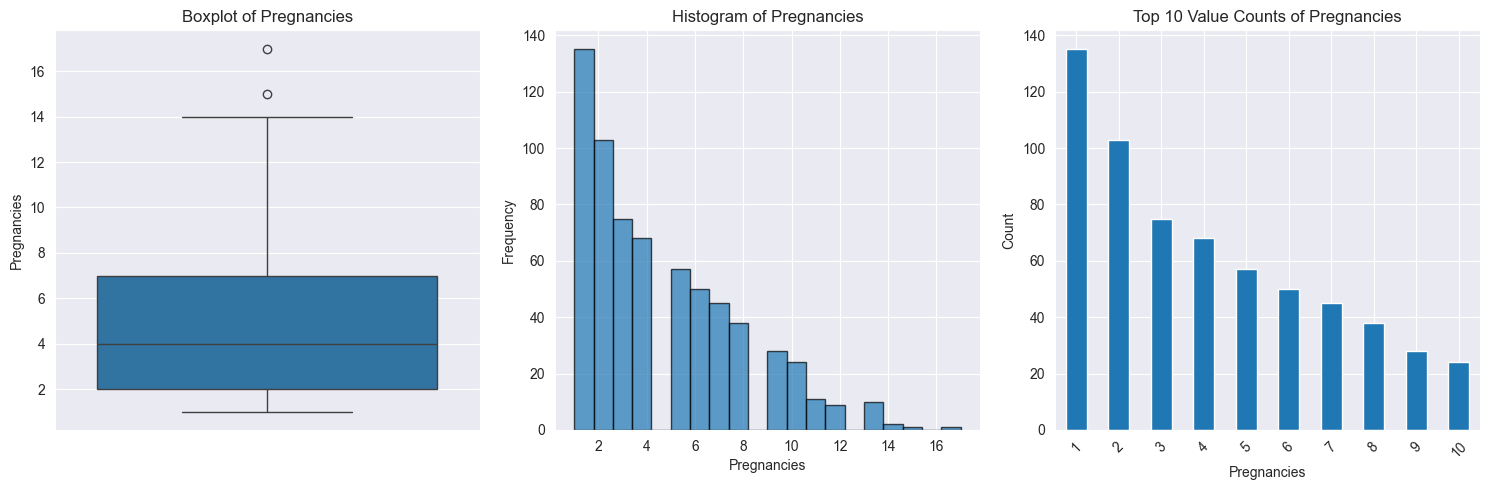


Pregnancies - Value Counts Summary:
Unique values: 16
Most common values:
Pregnancies
1    135
2    103
3     75
4     68
5     57
Name: count, dtype: int64
--------------------------------------------------


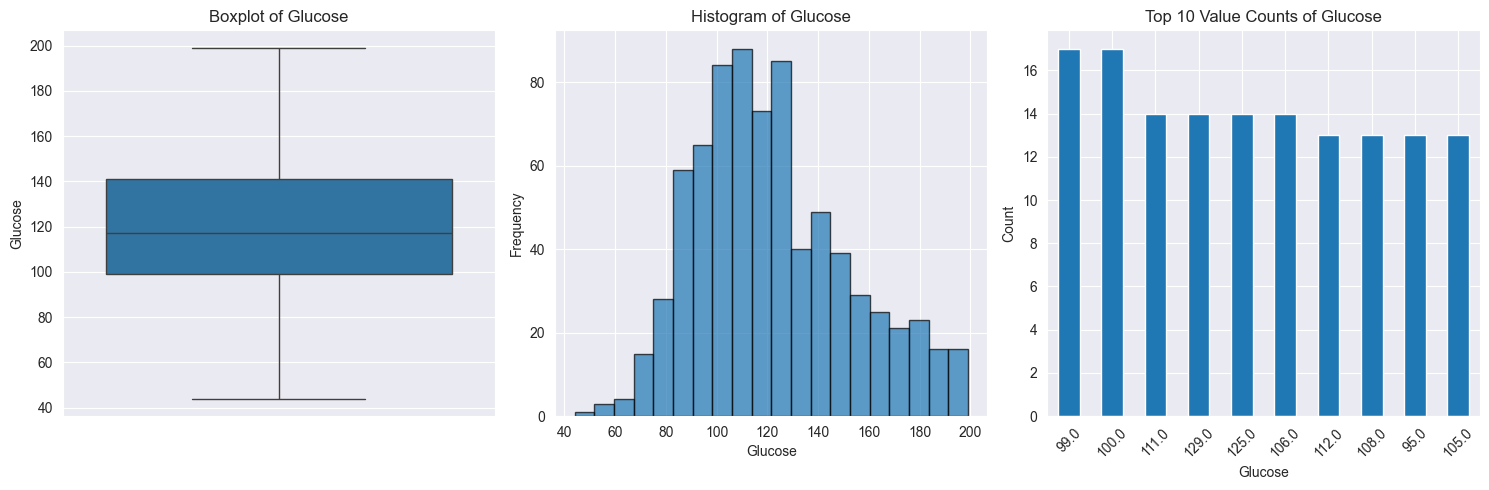


Glucose - Value Counts Summary:
Unique values: 135
Most common values:
Glucose
99.0     17
100.0    17
111.0    14
129.0    14
125.0    14
Name: count, dtype: int64
--------------------------------------------------


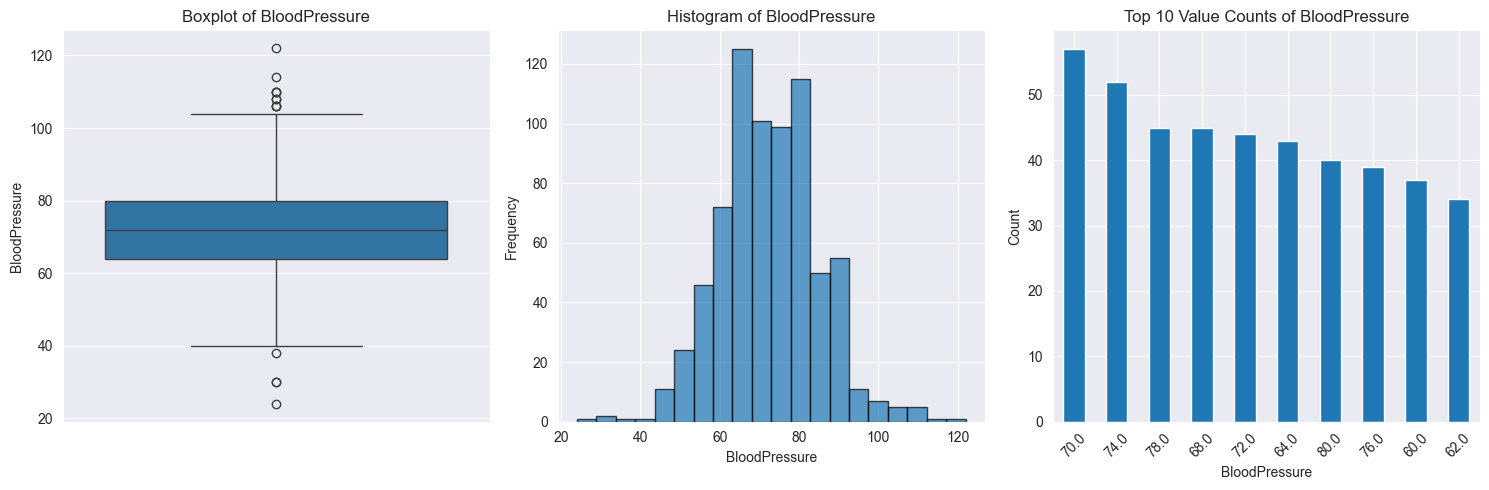


BloodPressure - Value Counts Summary:
Unique values: 46
Most common values:
BloodPressure
70.0    57
74.0    52
78.0    45
68.0    45
72.0    44
Name: count, dtype: int64
--------------------------------------------------


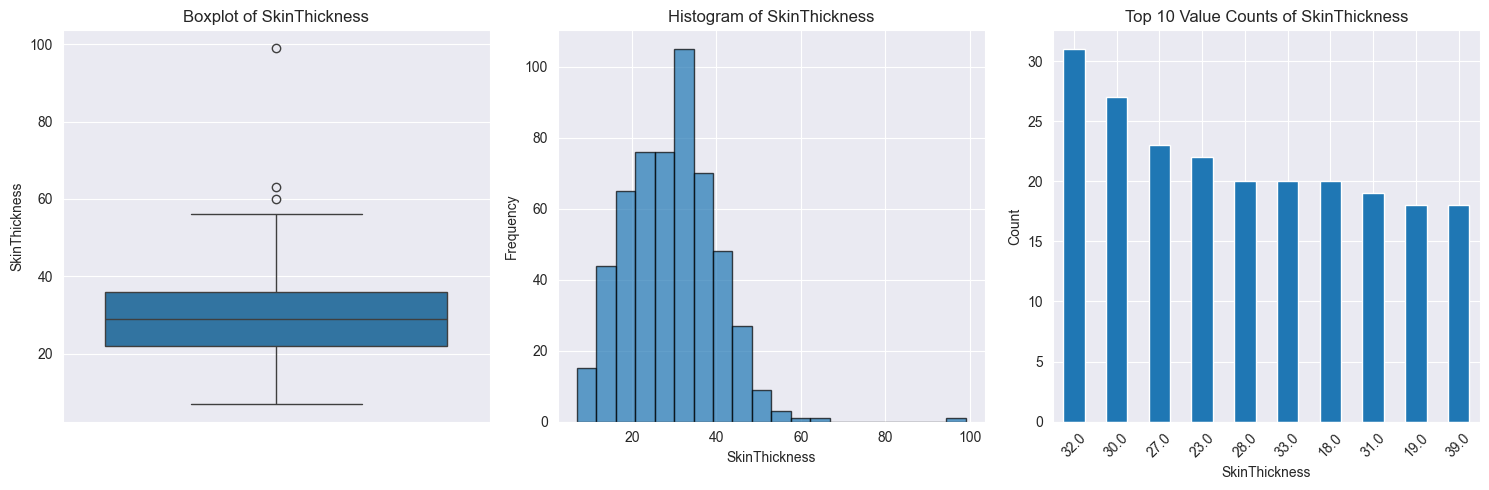


SkinThickness - Value Counts Summary:
Unique values: 50
Most common values:
SkinThickness
32.0    31
30.0    27
27.0    23
23.0    22
28.0    20
Name: count, dtype: int64
--------------------------------------------------


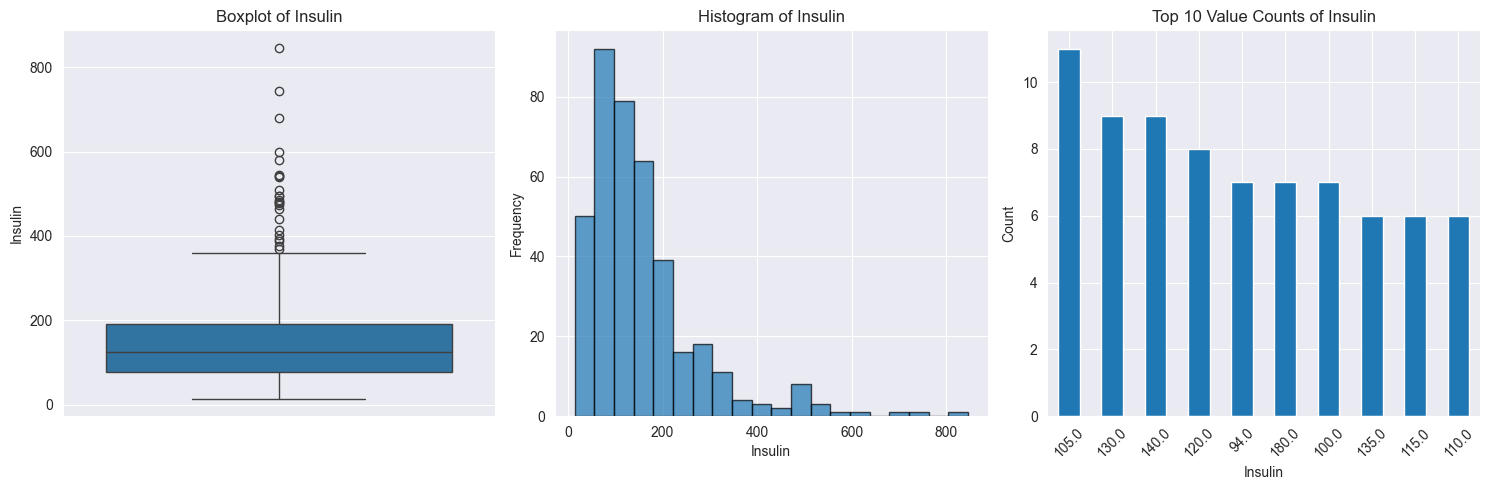


Insulin - Value Counts Summary:
Unique values: 185
Most common values:
Insulin
105.0    11
130.0     9
140.0     9
120.0     8
94.0      7
Name: count, dtype: int64
--------------------------------------------------


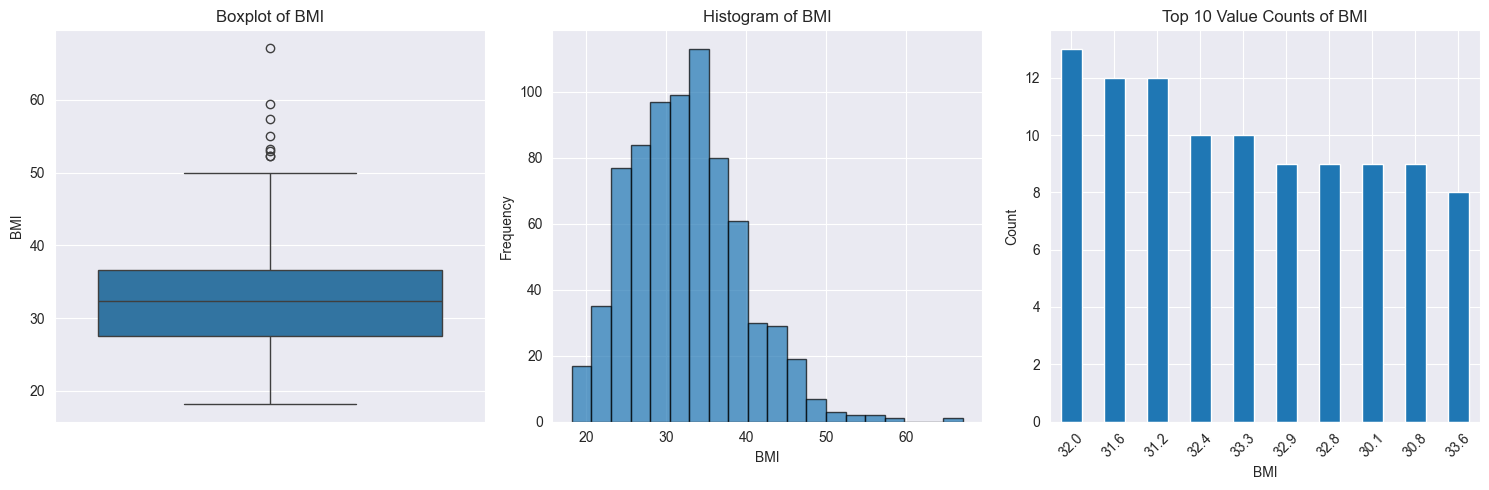


BMI - Value Counts Summary:
Unique values: 247
Most common values:
BMI
32.0    13
31.6    12
31.2    12
32.4    10
33.3    10
Name: count, dtype: int64
--------------------------------------------------


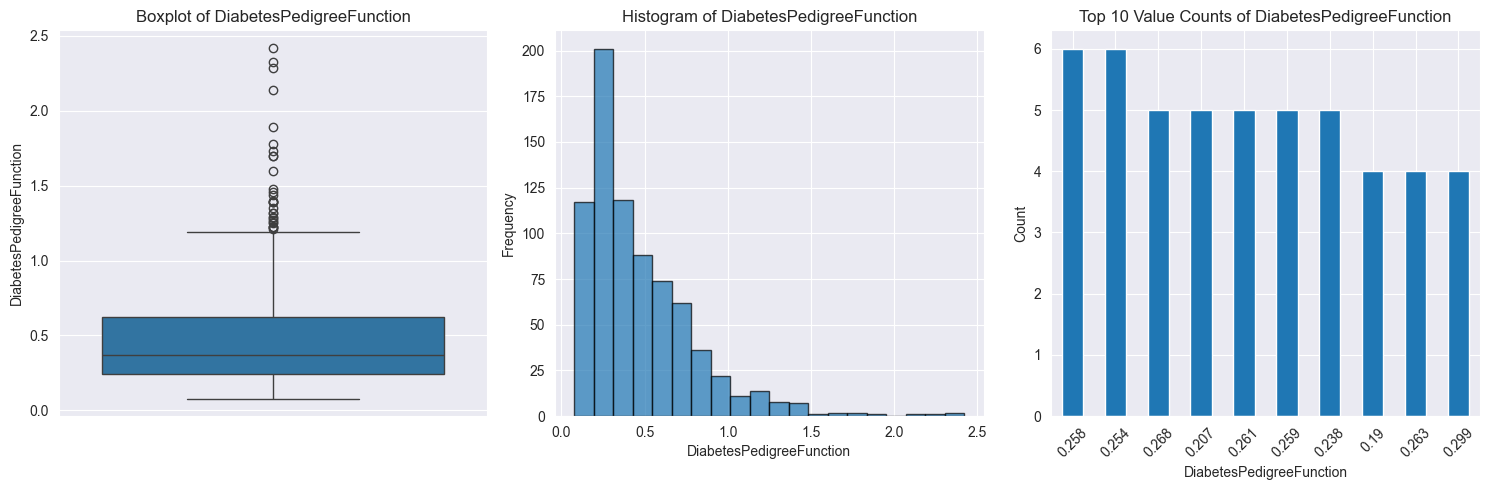


DiabetesPedigreeFunction - Value Counts Summary:
Unique values: 517
Most common values:
DiabetesPedigreeFunction
0.258    6
0.254    6
0.268    5
0.207    5
0.261    5
Name: count, dtype: int64
--------------------------------------------------


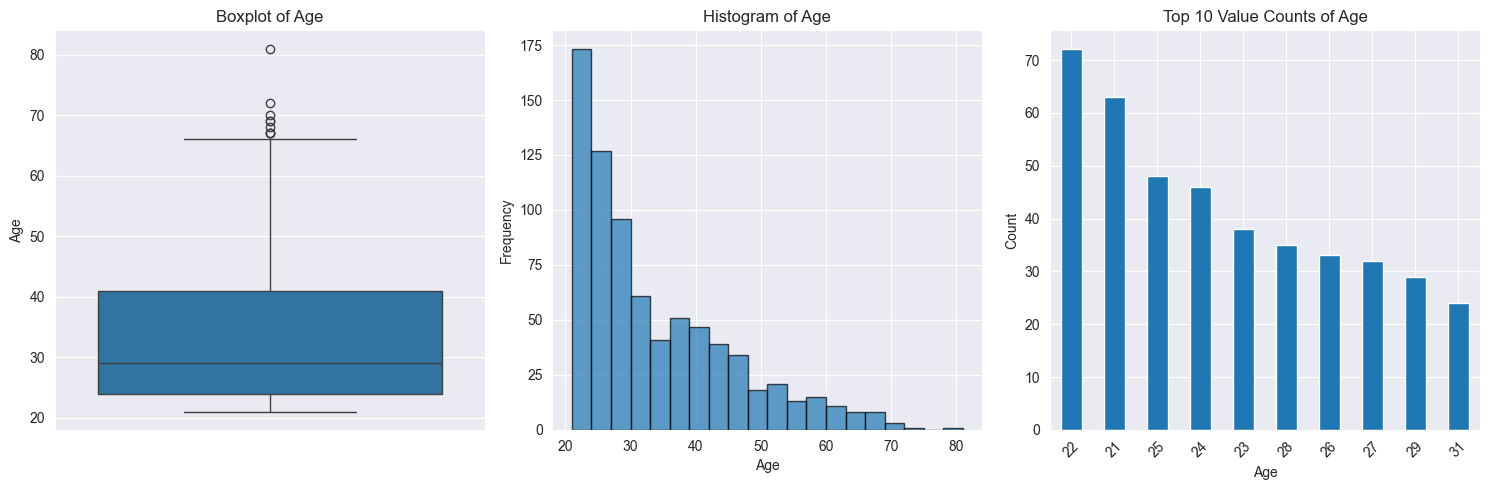


Age - Value Counts Summary:
Unique values: 52
Most common values:
Age
22    72
21    63
25    48
24    46
23    38
Name: count, dtype: int64
--------------------------------------------------


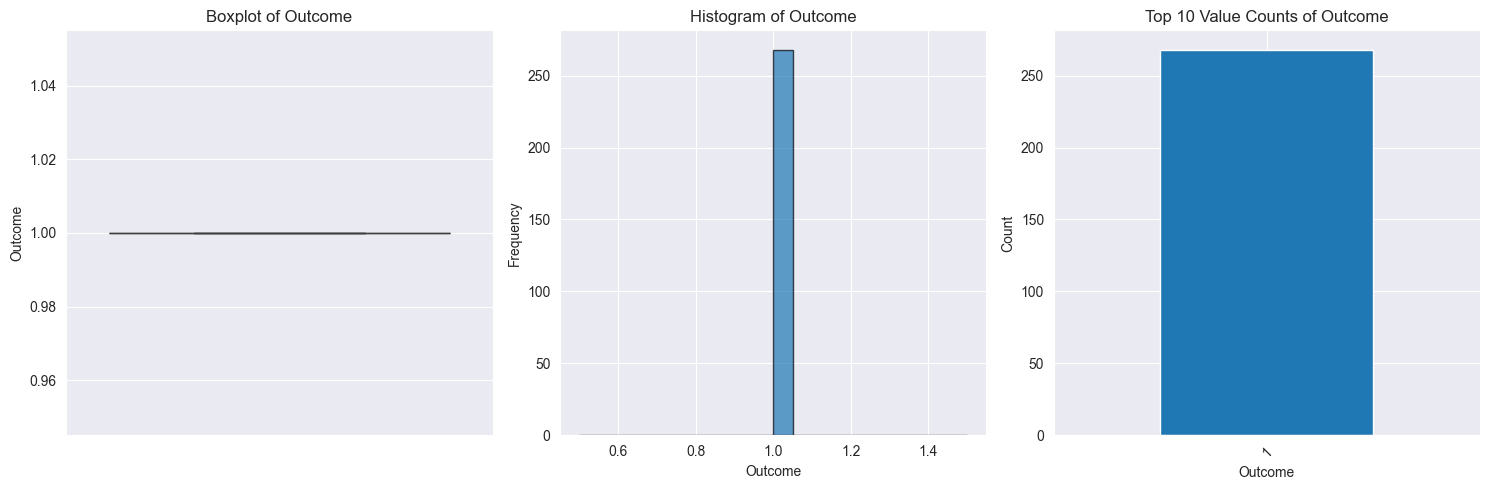


Outcome - Value Counts Summary:
Unique values: 1
Most common values:
Outcome
1    268
Name: count, dtype: int64
--------------------------------------------------


In [37]:
# Boxplot, histogram, and value counts to check for outliers and distributions
import matplotlib.pyplot as plt
import seaborn as sns
features_with_zero_as_invalid = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for i, feature in enumerate(df.columns, 1):
    # Create figure with subplots for each feature
    plt.figure(figsize=(15, 5))

    # Boxplot
    plt.subplot(1, 3, 1)
    sns.boxplot(y=df[feature][df[feature] != 0])
    plt.title(f'Boxplot of {feature}')

    # Histogram
    plt.subplot(1, 3, 2)
    plt.hist(df[feature][df[feature] != 0], bins=20, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    # Value counts (for discrete features or binned continuous features)
    plt.subplot(1, 3, 3)
    value_counts = df[feature][df[feature] != 0].value_counts().head(10)
    value_counts.plot(kind='bar')
    plt.title(f'Top 10 Value Counts of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

    # Print value counts summary
    print(f"\n{feature} - Value Counts Summary:")
    print(f"Unique values: {df[feature][df[feature] != 0].nunique()}")
    print(f"Most common values:")
    print(df[feature][df[feature] != 0].value_counts().head())
    print("-" * 50)


From the box plots above, we can see that there are significant outliers in these features, except for Glucose. Therefore, we can address those in post split phase using robust scaling or log transformation as appropriate.

#### **2.8 Bivariate Analysis**

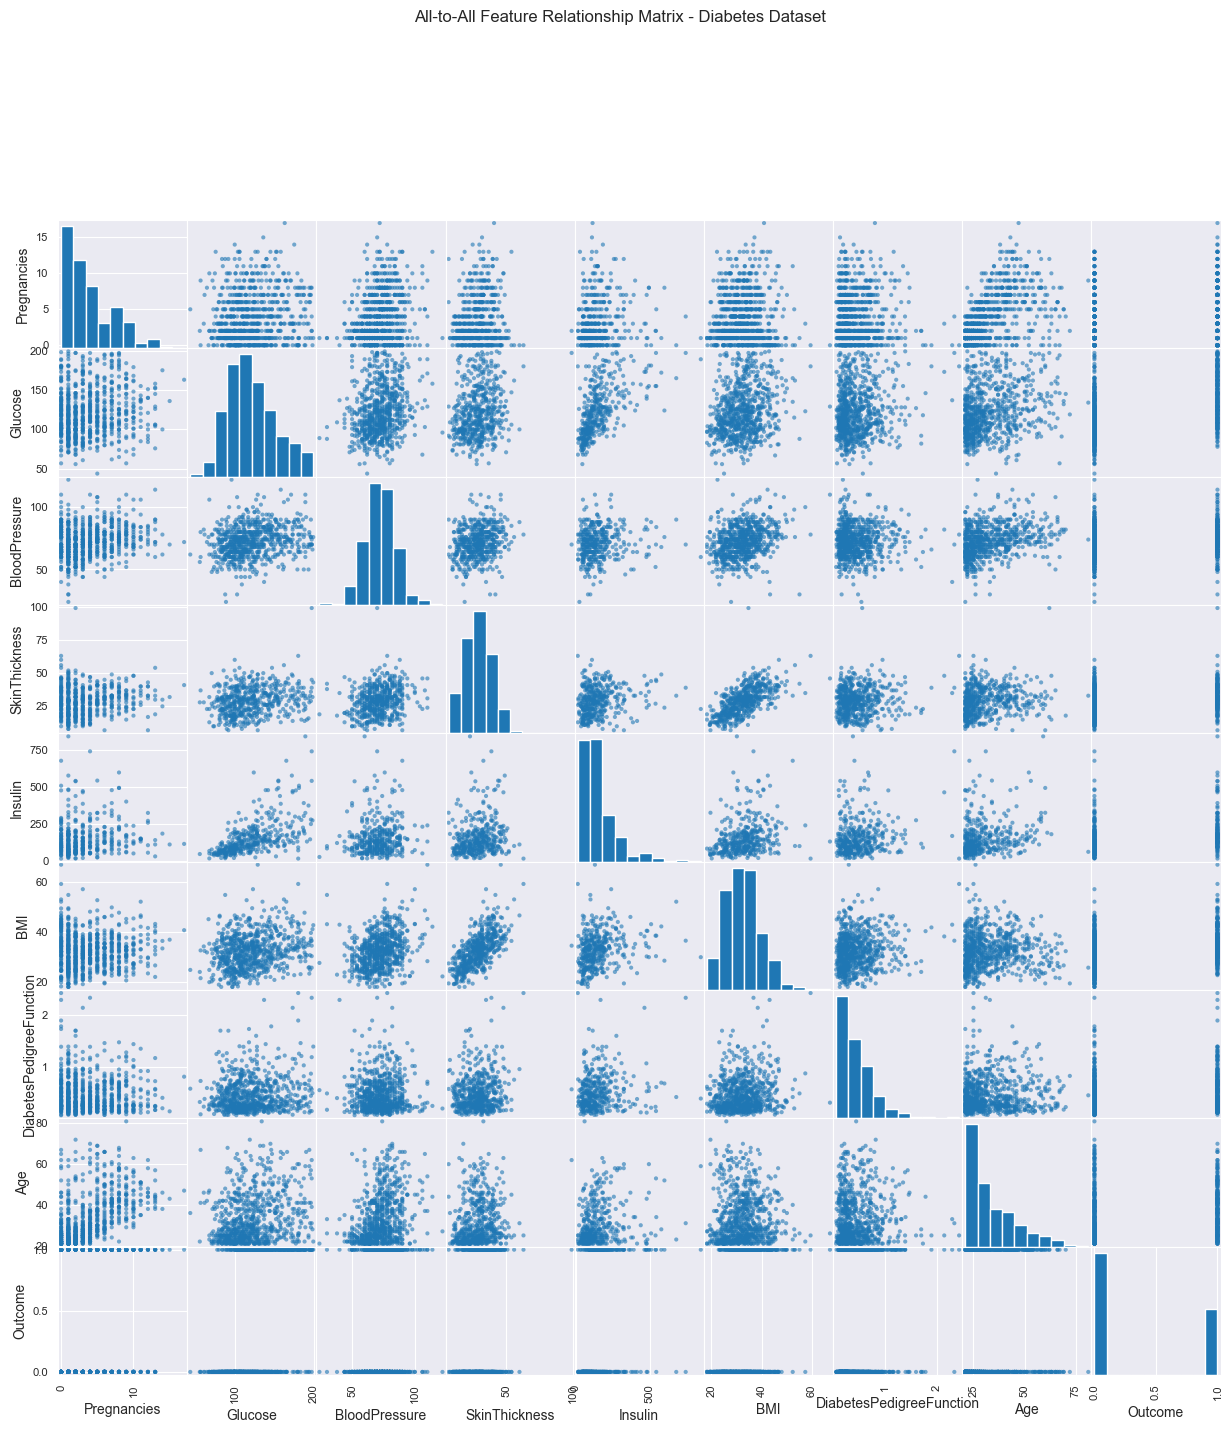

In [38]:
# Pairwise scatter matrix
pd.plotting.scatter_matrix(
    df,
    figsize=(15,15),
    diagonal='hist',
    alpha=0.6
)

plt.suptitle("All-to-All Feature Relationship Matrix - Diabetes Dataset", y=1.02)
plt.show()

#### **2.9 Target leakage check**
Check that no feature contains direct or indirect information about the target that would not be available at prediction time. This can be done by analyzing feature correlations with the target variable and understanding the data collection process to identify any potential leakage sources. If there are features that are found to be highly correlated with the target due to data leakage, they should be removed from the dataset to ensure the model learns genuine predictive patterns.

From the scatter matrix above, we can see that there is no obvious target leakage in the dataset as Outcome is not directly correlated with any feature.

In [28]:
features_with_zero_as_invalid = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for feature in features_with_zero_as_invalid:
    zero_count = (df[feature] == 0).sum()
    print(f'Count of zero values in {feature}:  {zero_count} \n % of zero values in {feature}:  {zero_count * 100 / len(df):.2f}%')
    if feature == 'Glucose':
        mean_value = df[feature].replace(0, np.nan).mean()
        df[feature] = df[feature].replace(0, mean_value)
    else:
        median_value = df[feature].replace(0, np.nan).median()
        df[feature] = df[feature].replace(0, median_value)


print(df.describe())

Count of zero values in Glucose:  0 
 % of zero values in Glucose:  0.00%
Count of zero values in BloodPressure:  0 
 % of zero values in BloodPressure:  0.00%
Count of zero values in SkinThickness:  0 
 % of zero values in SkinThickness:  0.00%
Count of zero values in Insulin:  0 
 % of zero values in Insulin:  0.00%
Count of zero values in BMI:  0 
 % of zero values in BMI:  0.00%
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  763.000000     733.000000     541.000000  394.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.535641      12.382158      10.476982  118.775855   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.000000      64.000000      22.000000   76.250000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  141.000000      80.000000      36.000000  190.000000   
max   

In [29]:
print(df.info())
print("\nStatistical summary of the dataset:")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB
None

Statistical summary of the dataset:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  763.000000     733.000000     541.000000  394.000000   
mean      3.845052  121.686763      72.405184 

#### **3.3 Scaling and Weighting**
From the summary statistics, we can see that the features are on different scales. For example,
- Age ranges from 21 to 81
- Insulin ranges from 14 to 846
So we will need to scale the features before feeding them into a machine learning model. We will use StandardScaler to standardize the features to have mean 0 and variance 1.